### Introduction to Classification

In [1]:
from sklearn.datasets import load_iris

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
import pandas as pd
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = y

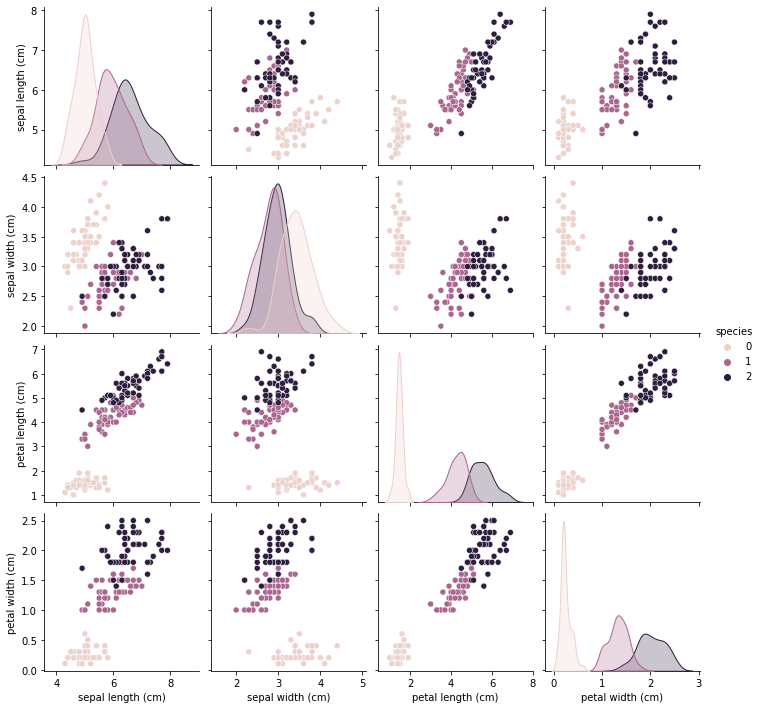

In [7]:
sns.pairplot(df, hue = 'species')

In [8]:
#NEED TO SCALE OUR DATA!!!
sscaler = StandardScaler()
Xscaled = sscaler.fit_transform(X)

In [9]:
knn = KNeighborsClassifier()
knn.fit(Xscaled, y)

KNeighborsClassifier()

In [10]:
knn.score(Xscaled, y)

0.9533333333333334

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [14]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [15]:
knn_pipe.score(X_test, y_test)

0.9736842105263158

In [24]:
params = {'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9, 11, 15],
         'kneighborsclassifier__p': [1, 2, 3, 4, 5]}

In [25]:
knn_grid = GridSearchCV(knn_pipe, param_grid=params)

In [26]:
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9,
                                                               11, 15],
                         'kneighborsclassifier__p': [1, 2, 3, 4, 5]})

In [27]:
knn_grid.score(X_test, y_test)

0.9736842105263158

In [28]:
knn_grid.best_params_

{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 2}

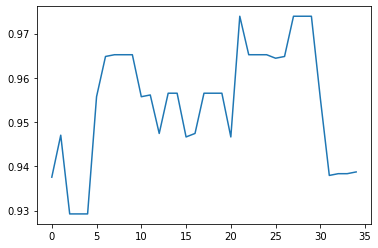

In [30]:
pd.DataFrame(knn_grid.cv_results_)['mean_test_score'].plot()